# Heat Maps & Market Maps

We'll build off our use of `bqplot` to make a dashboard with randomly sampled data last lecture to make interactive dashboards out of "real" data using the `UFO Dataset`.

We'll also look at the `Market Map` marks in `bqplot` for another representation of mappable data in a dashboard.

Let's import our usual stuff:

In [1]:
# import usual things
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
####%matplotlib inline

## Extra review from last time -- building up with 2D data in a histogram 

Lets start thinking about heatmaps with some random data:

In [2]:
# 1. Data
data = np.random.random((10, 10))
data # your's may look different!

array([[3.85939660e-01, 3.97321477e-01, 4.99557846e-01, 1.27110915e-01,
        8.17062579e-01, 8.58447999e-01, 8.67885358e-06, 9.59343996e-01,
        1.10030162e-01, 1.33154647e-02],
       [8.89697500e-01, 1.00408473e-01, 5.14701911e-01, 9.31808396e-01,
        3.80440566e-01, 1.67122019e-01, 8.94826004e-02, 2.55062006e-01,
        1.14715538e-01, 3.28136228e-01],
       [7.57511345e-01, 3.97414837e-01, 8.84440716e-01, 1.54466595e-01,
        4.79254063e-01, 4.17728949e-01, 3.96742244e-01, 1.93776192e-01,
        5.52344852e-01, 4.17012307e-01],
       [7.19405853e-01, 5.04958079e-02, 3.35913977e-01, 5.68639369e-01,
        8.78563905e-01, 7.29766600e-01, 7.17254190e-01, 1.05178102e-01,
        7.37066679e-01, 7.81617992e-01],
       [3.70890237e-01, 7.96446270e-01, 8.19329866e-01, 1.18139710e-01,
        1.43600672e-01, 9.21205828e-01, 1.49481036e-01, 1.00448548e-02,
        5.01274534e-01, 6.32683931e-01],
       [8.25396000e-01, 6.41629186e-01, 8.25918553e-01, 6.83707565e-02,
   

In [3]:
data.shape

(10, 10)

So we just have a 10 x 10 array here.

Lets start by generating a quick heat map with `bqplot`'s `GridHeatMap` marks function. We've been making plots with linear scales before, but now for a heatmap, we will want to make a color scale as well.  Let's start with just assigning a color scale, and going from there:

In [4]:
bqplot.ColorScale?

In [5]:
# 2. Scales -- in this case, just a color scale
col_sc = bqplot.ColorScale() # use bqplot to define a color scale

In [6]:
# 3. Axis -- skipping for now

In [7]:
bqplot.GridHeatMap?

In [8]:
# 4. Mark -- use colorscale to make make grid heatmap of our data:
heat_map = bqplot.GridHeatMap(color = data, scales = {'color': col_sc})

In [9]:
# 5. Skipping any interactions

In [10]:
# Finally: put it together as a figure
fig = bqplot.Figure(marks = [heat_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[GridHeatMap(color=array([[3.85939…

There are some things we probably want to do here.  One of them being able to change the color scale -- we spent all this time thinking about color, let's put those thoughts to good use!

In [11]:
# 1. Data -- same as above

# 2. Scale -- color with new color scheme
col_sc = bqplot.ColorScale(scheme = "Greens") # color scheme of greens

# 3. skip Axis

# 4. Marks -- use colorscale to make make heatmap of our data:
heat_map = bqplot.GridHeatMap(color = data, scales = {'color': col_sc})

# Figure
fig = bqplot.Figure(marks = [heat_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[GridHeatMap(color=array([[3.85939…

In [12]:
bqplot.ColorAxis?

In [13]:
# 1. Data -- same

# 2. Scales -- color
col_sc = bqplot.ColorScale(scheme = "Greens")
# lets plot some axes on our plot as well, in this case
#  our axis will be a color bar, vertically on the right
#  of our heatmap

# 3. Axis (finally) -- here a "color axis" is just a colorbar
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right') 

# 4. Marks -- put it all together and lets take a look!
heat_map = bqplot.GridHeatMap(color = data, 
                              scales = {'color': col_sc})

# 5. no interactions

# generate fig!
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right')], fig_margin={…

While our x/y bins don't mean anything in particular in this case - we are dealing with just a randomly binned 10x10 dataset after all - we none-the-less probably want to put at least the bin labels on there.  So let's make some x/y scales and some x/y axis (note I'm doing Scales/Axis a bit out of order here to group by kind of axis):

In [14]:
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

Why did I choose ordinal scales?  Well again - the bins, while numbered, don't actually mean anything, so in a sense they are "categorical" bins, and our scales should reflect that fact!

Color scale & color axis like before:

In [15]:
col_sc = bqplot.ColorScale(scheme = "Reds")

c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

Combine all these scales, axis and the data into a heat map mark using `bqplot.GridHeatMap`:

In [16]:
# Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc})

... put these marks and axes on a figure canvas and plot it!

In [17]:
# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

So, we are almost there -- we don't have any interactivity!  Let's get into it.  In this case, we can actually specify the interaction when we are constructing the `GridHeatMap` mark.  Let's do something when we click on each square.  We can do this with a `click-select` interaction.  

In [18]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Greens")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'magenta'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here!

# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right'), Axis(orientat…

Ok fine, but our selection isn't linked to anything! Lets check out what heat_map selected actually is before we decide to do something with it:

In [19]:
heat_map.selected
#  note if I select a different box & re-run this cell,
#  I get out different values

So the *trait* of the heat_map that gets updated when we select a box is the x/y indicies.

Let's start simple: write a little function that links the data value to the selected & lets print this in a little ipywidgets label:

In [20]:
mySelectedLabel = ipywidgets.Label()

Let's now define what happens to this label when our heatmap is selected.  If we recall back to when we started learning about ipywidgets and traitlets, this will be a change in the `mySelectedLabel` widget's *value* when a *trait* of our `GridHeatMap` object changes.

First, let's define this action, starting simple: just print out whatever is selected:

In [21]:
def on_selected(change):
    print(change)

Now, let's re-construct our heatmap and link this `on_selected` function to the *trait* of the selected heatmap:

In [22]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

So, we can see that what gets printed out when we select is a dictionary -- this is like a "change" dictionary with an ipywidget that we played with last week and it has some familiar things in it like the `old` and `new` keys, the `owner` key, etc.  

Check out the `selected=array...` in the above -- this is how we can grab the index of whatever grid we have selected.

It also is storing a lot of information about our `GridHeatMap` plot!  

Since the change "owner" is our heat_map marks, let's print these out so we can access the indicies.  Once we do this, we can then use these indicies to access the data in our plot.  

One thing at a time though - let's just print out the selected indicies:

In [23]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

It turns out we can actually `SHIFT-select` and select a selection of boxes at one time.  Depending on your browser/OS you can also use `CMD` or `CTRL`-select to select individual boxes.  However, this is a little bit dependent on how your browser/trackpad/mouse is set up.

(`CMD`-select doesn't work in notebooks on my Mac, but it does in jupyter-lab.  Go fig.)

**DEMONSTRATE**

Because of this we actual `selected` set of indicies we want to access can be more than just x/y indicies - it can be an array of indicies representing all of the `SHIFT-select`ed points.

For the sake of simplicity, let's *only* do things when we select one point.  So we will *only* take out the first element of this selected array.  Let's print this with our `on_selected` function:

In [24]:
def on_selected(change):
    if len(change['owner'].selected) == 1: #only do things if I select a single cell
        print(change['owner'].selected[0])
    # else: don't update anything

In [25]:
#1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Greens")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'magenta'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Greens'), side='right'), Axis(orientat…

Now you'll notice if I `SHIFT-select` I still only get the set of x/y indicies associated with the blue selected point.  Sweet.

Now that we have these indicies in our plot, we can (finally) update our Label widget to print out what the data value is at this point:

In [26]:
def on_selected(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i, j = change['owner'].selected[0] # grab the x/y coordinates
        v = data[i,j] # grab data value
        mySelectedLabel.value = 'Data Value = ' + str(v) # set our label

Now we just have to make sure we show both of the figure and the label when we display:

In [27]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])


# ADDED: putting widget and plot together
myDashboard = ipywidgets.VBox([mySelectedLabel, fig]) # have label on top of fig
myDashboard # show

Hey neat!  So now when we do an action, in this case selecting, on one object (the heat map) we have updates *tied to* another object, in this case we are also updating our label widget's value.

This is how we will build up dashboards that allow us to display different aspects of our data in linked views.

Let's practice one of these linked views now by making a linked histogram of a 3D dataset instead of printing the value with a 2D dataset.

## Multidimension (3D) data

Last time we generated random data in 3D:

We started by making a 3D dataset:

In [28]:
data3d = np.random.random( (10,10, 20))

In [29]:
data3d.shape # x, y, z

(10, 10, 20)

Recall we selected specfic x/y indices to plot.  For example if x=y=0:

In [30]:
i,j=0,0
data3d[i,j,:]

array([0.58207825, 0.5792689 , 0.29789004, 0.78235965, 0.74627593,
       0.28968332, 0.68688795, 0.32237109, 0.13007682, 0.17266191,
       0.70111574, 0.70699366, 0.63291273, 0.0446647 , 0.51423325,
       0.0389633 , 0.28838611, 0.88958536, 0.01416155, 0.60497292])

In [31]:
data3d[0,0,:]

array([0.58207825, 0.5792689 , 0.29789004, 0.78235965, 0.74627593,
       0.28968332, 0.68688795, 0.32237109, 0.13007682, 0.17266191,
       0.70111574, 0.70699366, 0.63291273, 0.0446647 , 0.51423325,
       0.0389633 , 0.28838611, 0.88958536, 0.01416155, 0.60497292])

In [32]:
data3d[0,0,:].mean()

0.4512771581428664

Now that we've decided how our label will look.  What about our heat map?  We know this is expecting 2d data as an input.  So, we'll do the same thing, we'll take a mean, but we'll do it over the whole array:

In [33]:
data3d.mean(axis=2)

array([[0.45127716, 0.62573863, 0.50909483, 0.49092615, 0.5011184 ,
        0.51511015, 0.59882023, 0.43061801, 0.50123863, 0.43156664],
       [0.42382393, 0.63440408, 0.45584893, 0.40634455, 0.45147421,
        0.53249177, 0.45896682, 0.51331908, 0.49307835, 0.52195129],
       [0.56326846, 0.58617881, 0.47368345, 0.51293991, 0.44560138,
        0.60043195, 0.49875334, 0.38230023, 0.54040971, 0.48101385],
       [0.52002628, 0.41641504, 0.55010266, 0.52751384, 0.46239953,
        0.46867628, 0.53682915, 0.44755085, 0.50813127, 0.5523064 ],
       [0.4657831 , 0.52508002, 0.43474763, 0.62640199, 0.53991755,
        0.43916912, 0.47139997, 0.65186241, 0.51879748, 0.57040209],
       [0.46216566, 0.44218649, 0.48534566, 0.51598181, 0.47303949,
        0.47857421, 0.51958923, 0.48413891, 0.51749782, 0.47319334],
       [0.50792816, 0.59652867, 0.52524948, 0.5481783 , 0.55298592,
        0.53533086, 0.51738575, 0.44595485, 0.4868514 , 0.61055092],
       [0.62875374, 0.6297648 , 0.4900576

In [34]:
data3d.mean(axis=2).shape

(10, 10)

Let's build up our dashboard again, I'll copy-paste into Slack/zoom:

In [35]:
mySelectedLabel = ipywidgets.Label() # start with our label

So, all we need to to begin with is just add this sort of mean into our observation function:

In [36]:
# first, just print out what is changing, what is selected
# only support 1 selected grid

def on_selected(change):
    if len(change['owner'].selected) == 1: #only do things if I select a single cell
        #print(change['owner'].selected[0])
        i, j = change['owner'].selected[0]
        v = data3d[i,j,:].mean() # CHANGE HERE
        mySelectedLabel.value = 'Mean Data Value = ' + str(v)
    
# 1. Data -- now 3d

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Greens") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', 
                          side='right') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap -- CHANGE HERE
heat_map = bqplot.GridHeatMap(color = data3d.mean(axis=2), 
                              scales = {'color':col_sc, 
                                        'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'magenta'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!
#fig

# combine the widget & figure and display both at the same time!
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard # show the dashboard

Ok, so we have the first few components of our dashboard with our new 3D dataset.  Let's work on the histogram.  We'll put this to the right of our label+heatmap, but first things first, the histogram:

In [37]:
# 1. Data -- what is the data for the histogram
i, j = 0, 0 # just as an example
data3d[i,j] # 20 elements

array([0.58207825, 0.5792689 , 0.29789004, 0.78235965, 0.74627593,
       0.28968332, 0.68688795, 0.32237109, 0.13007682, 0.17266191,
       0.70111574, 0.70699366, 0.63291273, 0.0446647 , 0.51423325,
       0.0389633 , 0.28838611, 0.88958536, 0.01416155, 0.60497292])

This is the data that we want to feed into our histogram so that if we select on i,j with our heatmap it will show us the distribution of values along the 3rd dimension.

In [38]:
# 2. Scales -- linear for a histogram of numerical data
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

In [39]:
# 3. Axis
x_axh = bqplot.Axis(scale = x_sch, label = 'Value of 3rd axis')
y_axh = bqplot.Axis(scale = y_sch, 
                    orientation = 'vertical', 
                    label='Frequency')

Marks will be the bqplot.Hist mark for histograms:

In [40]:
bqplot.Hist?

In [41]:
hist = bqplot.Hist(sample = data3d[i,j,:], # note: we are "hard coding" the x/y indicies as i,j
                   normalized = False, # normalized=False means we get counts in each bin
                   scales = {'sample': x_sch, 'count': y_sch}, # sample is data values, count is frequency
                   bins = 5) # number of bins

Note here that we specified this plot in a different way than the `GridHeatMap` and `Scatter` -- each type of `bqplot` plot has different parameters associated with the type of plot we are using.  Let's combine this as a figure and take a look!

In [42]:
# put it all together in a histogram
figh = bqplot.Figure(marks = [hist], axes = [x_axh, y_axh])
figh # your's might look different because you have different random numbers!

Figure(axes=[Axis(label='Value of 3rd axis', scale=LinearScale()), Axis(label='Frequency', orientation='vertic…

Let's pause here and think about how to link up our histogram i,j with our selections on the heatmap.  First, what values of the histogram can we update?  Let's check:

In [43]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [44]:
hist.sample

array([0.58207825, 0.5792689 , 0.29789004, 0.78235965, 0.74627593,
       0.28968332, 0.68688795, 0.32237109, 0.13007682, 0.17266191,
       0.70111574, 0.70699366, 0.63291273, 0.0446647 , 0.51423325,
       0.0389633 , 0.28838611, 0.88958536, 0.01416155, 0.60497292])

Hey!  Here is where our data values are stored!  Like with when we observe changes in our heat map and update the values of our ipywidget's value we want to also update this sample's data!  

Let's update our `on_selected` function to reflect this:

In [45]:
def on_selected(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i, j = change['owner'].selected[0] # grab the x/y coordinates
        v = data3d[i,j].mean() # grab data value at x/y index and mean along z
        mySelectedLabel.value = 'Data Sum = ' + str(v) # set our label
        # NOW ALSO: update our histogram
        hist.sample = data3d[i,j,:]

We don't have to go through the exersise of rebuilding our heatmap and histogram in general, but let's just do it for the sake of completeness and not accidentally re-linking thinks we shouldn't:

#1 heatmap:

In [46]:
# (1) Scales: x/y, colors
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# (2) Axis: x/y, colors
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# (3) Marks: heatmap
heat_map = bqplot.GridHeatMap(color = data3d.mean(axis=2),
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# (4) Link selection on heatmap to other things
heat_map.observe(on_selected, 'selected')

# (5) Paint heatmap canvas, don't display yet:
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])

#2 histogram:

In [47]:
# (1) scales: x/y, linear
x_sch = bqplot.LinearScale() # range of z-axis data
y_sch = bqplot.LinearScale() # frequency of z-axis data in bins

# (2) axis: x/y
x_axh = bqplot.Axis(scale = x_sch, label = 'Value of 3rd axis')
y_axh = bqplot.Axis(scale = y_sch, 
                    orientation = 'vertical', 
                    label='Frequency')

# (3) Marks: histogram - start with just 0,0 in i/j -- can do other place holders
hist = bqplot.Hist(sample = data3d[0,0,:],
                   normalized = False, # normalized=False means we get counts in each bin
                   scales = {'sample': x_sch, 'count': y_sch}, # sample is data values, count is frequency
                   bins = 5) # number of bins

# (4) NO LINKING ON HISTOGRAM SIDE

# (5) Paint histogram canvas, don't display yet
fig_hist = bqplot.Figure(marks = [hist], axes = [x_axh, y_axh])

Create dashboard layout and display:

In [48]:
# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

Ok close, but its all smooshed!  We can play with the layout of our plots before we display.  To do this we use some more CSS-like styling options, in particular, `layout`:

In [49]:
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

In [50]:
# mess with figure layout:
fig_heatmap.layout.min_width = '500px' # feel free to change for your screen
fig_hist.layout.min_width = '500px'

# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

Note that update was "back-reactive" in that it changed the figure layout above as well!  Super sweet!

#### Further complications: linking in different directions

We can also apply some other links to further enhance our dashboard.  One that we've messed with before is allowing the user to select the number of bins of a histogram.

There are a few ways to do this, but one "easier" way is to just link the histogram "bins" with the value of a bins-slider.  

If we recall: `bins` was another key that was listed in hist:

In [51]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [52]:
hist.bins = 5 # this changes the bins of our histogram above in a back-reactive way -- traitlets magic!

Let's add a little integer slider to allow our user to select the number of bins for the histogram:

In [53]:
bins_slider = ipywidgets.IntSlider(value=5, min=1, max=data3d.shape[2]) # don't make more bins than data points!

A reminder of what this looks like:

In [54]:
bins_slider

IntSlider(value=5, max=20, min=1)

We can use `link` or `jslink` to link the value of this slider to our histogram's number of bins:

In [55]:
ipywidgets.jslink((bins_slider, 'value'), (hist, 'bins'))

Link(source=(IntSlider(value=5, max=20, min=1), 'value'), target=(Hist(bins=5, colors=['steelblue'], interacti…

While this change is "backreactive", let's redo our figure layout so we can see everything a bit better:

In [56]:
# mess with figure layout:
fig_heatmap.layout.min_width = '500px' # feel free to change for your screen
fig_hist.layout.min_width = '500px'

# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top to the left, bins slider to the right
controls = ipywidgets.HBox([mySelectedLabel, bins_slider])

# combined
myDashboard = ipywidgets.VBox([controls, figures])
myDashboard

## Dashboarding with "real" data using the UFO dataset

Let's read in the UFO dataset:

In [57]:
data_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/ufo-scrubbed-geocoded-time-standardized-00.csv'
ufos = pd.read_csv(data_url,
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", 
                           "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [58]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


### Aside: downsampling

We have covered downsampling before, but we will repeat it here in case folks have slower computers and don't want to use the full dataset while in class.

We can remind ourselves of how many entries are in this dataset:

In [59]:
len(ufos)

80332

80,000 entries is a lot!  So, to speed up our interactivity, we can randomly sample this dataset for plotting purposes.  Lets down sample to 1000 samples:

In [60]:
nsamples = 1000
#nsamples = 5000 # if you want a larger sample
downSampleMask = np.random.choice(range(len(ufos)-1), 
                                  nsamples, replace=False)
downSampleMask
# so, downsample mask is now a list of random indicies for 
#  the UFO dataset.  Your's will not be the same because we have not set a seed.

array([49312, 68116, 13691,  1605, 36159, 75828, 59991,  7582,  1288,
       15812, 50272, 63448,  5700, 65259, 52084, 52871, 27624, 35727,
       61391, 73264,  1601,  8821, 49431, 66616, 24323, 64961, 15829,
       15851, 61238, 20970, 33135, 73210,  7274, 39959, 28770, 31709,
       47144, 35377, 11378, 19361, 13205, 23490,  3304, 26948, 36379,
       34537,  3025, 17252, 75207, 57788, 78888,  6298, 52370, 14990,
       48496, 61108, 67449, 60002, 35920, 52387, 46486, 44027, 53493,
       48776, 66513,  6437,  9402, 53444, 62637, 21297,  6935,  8247,
       56296, 48923,  9314, 56752,  1930, 67507, 55654, 41682, 18368,
       36124, 50217, 30075, 23629, 46737, 30973, 41213, 39970, 72799,
       65155, 15575,   523, 17010, 74864, 59854, 13917, 75150, 33642,
       59491, 42162, 11665, 49334, 64681, 15341, 60399, 64113, 17227,
       17671, 45150, 14487, 52417, 58227, 48524, 20281, 62552,  8659,
       28965, 39678, 55257, 32187, 64345, 77040, 63976, 21660, 25441,
       21226, 65662,

Let's create a subset of our data with the `.loc` function:

In [61]:
ufosDS = ufos.loc[downSampleMask]
len(ufosDS)
# so much shorter

1000

We can also see that this is saved as a dataframe:

In [62]:
ufosDS #DS=down sample

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
49312,2005-06-15 22:30:00,louisville,ky,us,light,10.0,10 seconds,3 friends watched by a bluish light that moved...,2006-10-30,38.254167,-85.759444
68116,2007-08-20 22:05:00,edmond,ok,us,sphere,120.0,2 min.,Two bright star looking objects moving at unbe...,2007-10-08,35.652778,-97.477778
13691,2011-11-29 03:35:00,marquette,mi,us,light,240.0,4 min,Light object in sky dims then moves away towar...,2011-12-12,46.543611,-87.395278
1605,2007-10-14 21:25:00,surprise,az,us,other,1.5,1.5 seconds,Streak in sky changes direction,2007-11-28,33.630556,-112.332500
36159,2007-04-01 21:36:00,greensboro,pa,us,oval,300.0,1/4 hour,Object was moving s.w to n.e. rounded in front...,2007-04-27,39.791111,-79.913056
...,...,...,...,...,...,...,...,...,...,...,...
9563,2007-11-15 06:13:00,richmond hill,ga,us,changing,180.0,3 minutes,Very Bright object in morning sky. ((NUFORC N...,2007-11-28,31.938056,-81.303611
33876,2004-03-28 20:00:00,martinez,ca,us,fireball,420.0,5-7 minutes,Fireballs performing amazing feats.,2004-04-09,38.019444,-122.133056
38448,2001-04-22 06:33:00,fairhaven,ma,us,sphere,300.0,5 minutes,Unknown brilliant spheres baffles Massachusset...,2002-07-26,41.637500,-70.904167
67047,2011-08-16 01:00:00,raytown,mo,us,triangle,900.0,10-15 min,Very bright color changing triangular shaped o...,2011-08-21,39.008611,-94.463333


Lets make a super quick scatter plot to remind ourselves what this looks like:

In [63]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')

#(1) set up marks
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          scales = {'x': x_sc, 'y': y_sc})

# all together now
fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

Note I haven't added in colors or interactions.  Let's at least add some colors in:

In [64]:
# lets make a super quick scatter plot to remind ourselves what this looks like:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
col_sc = bqplot.ColorScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')


# Let's add in a color scale
c_sc = bqplot.ColorScale() # color scale
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label='Duration in sec', 
                        orientation = 'vertical', side = 'right')

# now replot:
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          color=ufosDS['duration_seconds'],
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})


fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

You'll note that this is a pretty muted color map.  This is because we are coloring by duration, and if you recall there is a *huge* range in durations:

In [65]:
ufosDS['duration_seconds'].min(), ufosDS['duration_seconds'].max()

(0.5, 219300.0)

To account for this, let's take the log-base-10 of the duration when we plot.  We should make sure we specify this on our color axis (color bar) label:

In [66]:
# lets make a super quick scatter plot to remind ourselves what this looks like:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')


# (2) recall we can also color by things like duration
c_sc = bqplot.ColorScale() # color scale

# updated color axis with log scaling
c_ax = bqplot.ColorAxis(scale = c_sc, label='log10(sec)', 
                        orientation = 'vertical', side = 'right')
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          color=np.log10(ufosDS['duration_seconds']), # here we take log, base 10
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

## Heatmap Dashboard with our UFO dataset.

Now we are going to use our heatmap idea to plot this data again. Note this will shmear out a lot of the nice map stuff we see above since we will be binning in lat/long. Don't worry!  We'll talk about making maps in the 2nd part of class. 

What should we color by?  Lets do by duration again.

To get this to work with our heatmap, we're going to have to do some rebinning. Right now, our data is all in 1 long list we need to rebin things in a 2d histogram where the x axis is longitude & y is latitude.

There are a few ways to do this, we'll use numpy to do our binning and use this as input into `bqplot.GridHeatMap`.  Before that, we can get a sense of what we think things will look like using matplotlib's `hist2d`.  We'll use the siting duration as *weights* into our histogram - so bins that have several long sitings will be counted as significant as well as bins that have multiple short sitings.

We'll skip down to the code to do the histogramming, but here is an aside with more details if you'd like to look at it:

### ASIDE

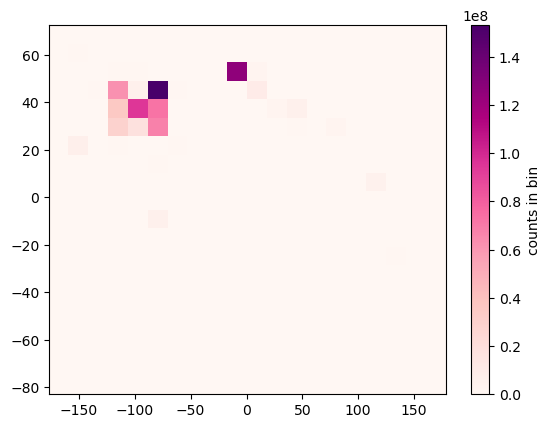

In [67]:
plt.hist2d(ufos['longitude'], ufos['latitude'], 
           weights=ufos['duration_seconds'], bins=20, cmap='RdPu')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [68]:
ufos['duration_seconds']

0        2700.0
1        7200.0
2          20.0
3          20.0
4         900.0
          ...  
80327     600.0
80328    1200.0
80329    1200.0
80330       5.0
80331    1020.0
Name: duration_seconds, Length: 80332, dtype: float64

Note that here I am using the whole UFO dataset again, since we are rebinning anyway.  Feel free to use `ufoDS` if it works better on your computer.

Again, we know that the duration should be log scaled, and we can do that with the `SymLogNorm` color scale in matplotlib if we want:

/var/folders/qt/_0bv3pr14c97mcyg8fc554bm0000gn/T/ipykernel_965/1037044519.py:3: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  bins=20, cmap='RdPu', norm = mpl_colors.SymLogNorm(10)) # ignorning the warning (10 -> e)


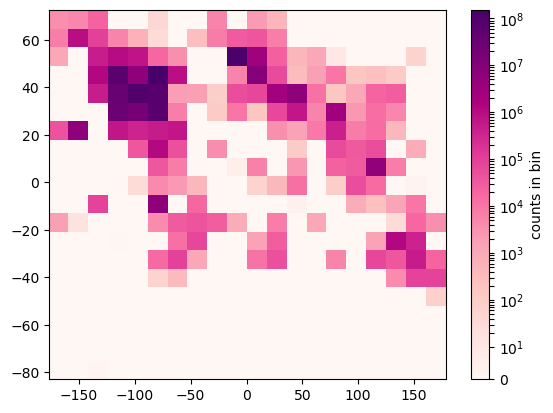

In [69]:
import matplotlib.colors as mpl_colors
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
           bins=20, cmap='RdPu', norm = mpl_colors.SymLogNorm(10)) # ignorning the warning (10 -> e)
cb = plt.colorbar()
cb.set_label('counts in bin')

Now this is starting to look a bit more like our scatter plot, but we can more easily make out areas of long duration (like in the US).  Ok, we want to incorporate interactivity, so let's use the `bqplot` engine + our ideas of the heatmap marks that we used last time to create our own clickable map.

Let's use `numpy`'s 2d histogram function to do that for us:

In [70]:
# ***START WITH 10 EACH**
nlong = 20 
nlat = 20

#(1)
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'], 
                                              bins=[nlong,nlat])

# this returns the TOTAL duration of ufo events in each bin
# Let's take a quick look at this data
hist2d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.80000000e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.70640000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.20300000e+03, 7.37100000e+03, 3.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.75425400e+06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.63978000e+05, 5.10500000e+03],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.78160000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.7449

In [71]:
hist2d.max(), hist2d.min() # a pretty big range!

(153348519.88, 0.0)

Let's take a quick look at this with `imshow` in `matplotlib`:

/var/folders/qt/_0bv3pr14c97mcyg8fc554bm0000gn/T/ipykernel_965/4008812176.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  plt.imshow(hist2d, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))


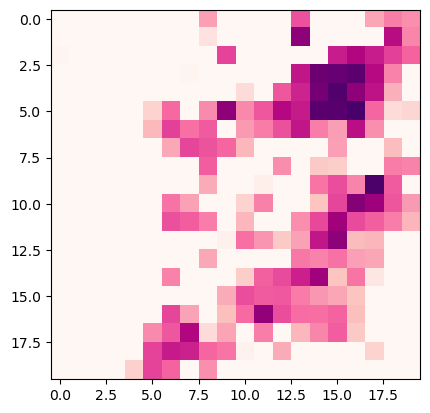

In [72]:
plt.imshow(hist2d, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Note that the x/y labels are just the bin indicies.  But even so, we can see that this is rotated to what we want to acutally plot!  

Different methods of histogramming will give you different shaped outputs.  Worse still, depending on what viz engine you're using, it expects different orientations of the data going in!  My suggestion is to experiement and make sure you're data is in the correct orientation by plotting it a few times.

For `bqplot`, we actually want our orientation to be *upsidedown* which we can get by taking the transpose of `hist2d`:

/var/folders/qt/_0bv3pr14c97mcyg8fc554bm0000gn/T/ipykernel_965/2115753836.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  plt.imshow(hist2d.T, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))


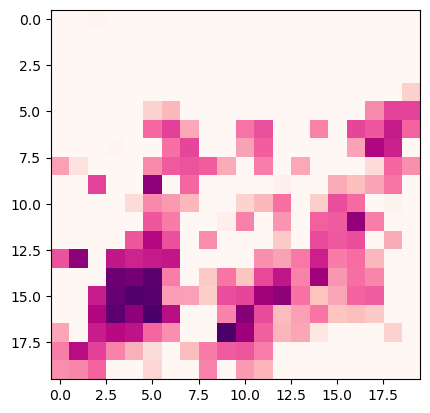

In [73]:
plt.imshow(hist2d.T, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Ok, let's make our histogramming more complex.  

As an aside: we want to treat the histogram as a probability instead of a total weighted count:

In [74]:
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'],
                                              density=True, 
                                              bins = [nlong,nlat])
hist2d.max(), hist2d.min()

(0.0015329854771788194, 0.0)

What are the shapes of the different outputs here?

In [75]:
hist2d.shape, long_edges.shape, lat_edges.shape

((20, 20), (21,), (21,))

Note that the long/lat edges have 1 more count than the histogram size.  This is because they are indeed edges.  To get bin centers, which is what we want to do for plotting we can do:

In [76]:
long_centers = (long_edges[:-1] + long_edges[1:]) / 2
long_centers

array([-167.78055671, -150.02555893, -132.27056115, -114.51556337,
        -96.76056559,  -79.00556781,  -61.25057003,  -43.49557225,
        -25.74057447,   -7.98557669,    9.76942109,   27.52441887,
         45.27941665,   63.03441443,   80.78941221,   98.54440999,
        116.29940777,  134.05440555,  151.80940333,  169.56440111])

In [77]:
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
lat_centers

array([-78.9736832, -71.1955456, -63.417408 , -55.6392704, -47.8611328,
       -40.0829952, -32.3048576, -24.52672  , -16.7485824,  -8.9704448,
        -1.1923072,   6.5858304,  14.363968 ,  22.1421056,  29.9202432,
        37.6983808,  45.4765184,  53.254656 ,  61.0327936,  68.8109312])

We might want to control where our bins are, we can do this by specifying bin edges ourselves:

In [78]:
long_bins = np.linspace(-150, 150, nlong+1)
lat_bins = np.linspace(-40, 70, nlat+1)
print(long_bins, long_bins.shape)
print(lat_bins, lat_bins.shape)

[-150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.    0.   15.
   30.   45.   60.   75.   90.  105.  120.  135.  150.] (21,)
[-40.  -34.5 -29.  -23.5 -18.  -12.5  -7.   -1.5   4.    9.5  15.   20.5
  26.   31.5  37.   42.5  48.   53.5  59.   64.5  70. ] (21,)


Let's take these bins as our inputs and regenerate our histogram:

In [79]:
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'],
                                              bins = [long_bins,lat_bins])

And grab our centers of lat and long for plotting as well (note: if you're like 30% with inline programming, that is totally fine!):

In [80]:
long_centers = (long_edges[:-1] + long_edges[1:]) / 2
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2

We know that we want to input this into `bqplot`'s grid heatmap, so we need to take the transpose:

In [81]:
hist2d = hist2d.T

What is the range of values in our plot?

In [82]:
hist2d.min(), hist2d.max(), hist2d[hist2d>0].min() # this is the *total duration* of sitings in a bin

(0.0, 125056847.51, 1.0)

We still have a big range in count values because we weighted by the non-log duration above.  So we'll instead take the log of our output histogram.

For aesthetic value, we want to have areas where there are no counts (like the ocean) show up as zero.  We can do that by a little trick -- setting the 0 values to `NaN`.  We will then take the log for color scaling:

In [83]:
np.log10(hist2d).min()

/var/folders/qt/_0bv3pr14c97mcyg8fc554bm0000gn/T/ipykernel_965/1257440567.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(hist2d).min()


-inf

The above gives us an error which can mess up our color maps.  So we'll be tricky:

In [84]:
hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
# then take log
hist2d = np.log10(hist2d)
#hist2d[0:10]

### END ASIDE

In the interest of time, we won't be doing the binning in class, but here is a function that will do this for us:

In [134]:
def generate_histogram_from_lat_long(ufos, nlong=20, nlat=20, longmin=-150, longmax=150,
                                     latmin=-40, latmax=70,
                                     takeLog=True):
    long_bins = np.linspace(longmin, longmax, nlong+1)
    lat_bins = np.linspace(latmin, latmax, nlat+1)
    hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                                   ufos['latitude'], 
                                                   weights=ufos['duration_seconds'],
                                                  bins = [long_bins,lat_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
    long_centers = (long_edges[:-1] + long_edges[1:]) / 2
    lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
    return hist2d, long_centers, lat_centers, long_edges, lat_edges

Now we'll just use this!

In [86]:
# data
hist2d, long_centers, lat_centers, long_edges, lat_edges = generate_histogram_from_lat_long(ufos)

Now that we have all that fancy binning out of the way, lets proceed as normal:

In [87]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - none yet

# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=8.09710747658943, min=0.0, scheme='RdPu'),…

Let's start building up our dashboard like before.  One easy thing we can do is add a label:

In [88]:
myLabel = ipywidgets.Label()
def on_selected(change):
    if len(change['owner'].selected) == 1: # only selecting one bin at a time
        i,j = change['owner'].selected[0]
        
        

# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - label
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
    
# make sure we check out     
heat_map.observe(get_data_value, 'selected')


# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel,fig])
myDashboard

Let's also include information about the duration as a function of date in a particular bin on another plot -- a scatter plot this time.  Let's first start by making this plot alone before putting it into our dashboard.

In [89]:
import datetime as dt # we'll use this to format our dates all fancy like

Now let's make our scales.  We'll start with a new `bqplot` scale called `DateScale`:

In [90]:
# 1. data for scatter plot already there

# 2. scales
x_scl = bqplot.DateScale(min=dt.datetime(1950,1,1),max=dt.datetime(2020,1,1)) # note: for dates on x-axis
y_scl = bqplot.LogScale()

Let's plot the duration on a log scale since we know that's probably what will look best based on the range of durations:

Our axis:

In [91]:
# 3. axis
x_ax = bqplot.Axis(label='Date', scale=x_scl)
y_ax = bqplot.Axis(label='Duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

our marks, in this case a scatter plot

Thinking ahead, we know that we want to select a 2d bin from our heatmap to then draw scatters for our scatter plot.  Let's write things in this way:

In [92]:
# picking an x/y bin -- this is one I know has a lot of data!
i,j = 19,0 

Let's specify the range of longs & lats for this selection of x/y bin:

In [93]:
longs = [long_edges[j], long_edges[j+1]] # min/max longitude
lats = [lat_edges[i],lat_edges[i+1]] # min/max latitude

In [94]:
long_min = long_edges[j]
long_max = long_edges[j+1]

In [95]:
long_min, long_max

(-150.0, -135.0)

In [96]:
lat_min = lat_edges[i]
lat_max = lat_edges[i+1]

In [97]:
lat_min, lat_max

(64.5, 70.0)

Let's *mask* out a subset of the UFO dataset with *only* these ranges of longitude and latitude:

In [98]:
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )

# we can see this selects for the upper right point of our heatmap
lats, longs, ufos['latitude'][region_mask]

([64.5, 70.0],
 [-150.0, -135.0],
 327      64.837778
 2845     64.837778
 3620     64.837778
 4602     64.751111
 6011     64.837778
            ...    
 77347    64.751111
 77497    64.837778
 78571    64.837778
 79029    64.837778
 79470    64.837778
 Name: latitude, Length: 74, dtype: float64)

In [99]:
ufos['latitude'][region_mask]

327      64.837778
2845     64.837778
3620     64.837778
4602     64.751111
6011     64.837778
           ...    
77347    64.751111
77497    64.837778
78571    64.837778
79029    64.837778
79470    64.837778
Name: latitude, Length: 74, dtype: float64

We won't add any interactivity to this plot -- the interactivity will be drawn from our heatmap, so all that is left to do is add in marks:

Marks

In [100]:
# lets plot the durations as a function of year there
duration_scatt = bqplot.Scatter(x = ufos['date'][region_mask],
                               y = ufos['duration_seconds'][region_mask], 
                              scales={'x':x_scl, 'y':y_scl})

#5: Put it all together and take a look!

In [101]:
fig_dur = bqplot.Figure(marks = [duration_scatt], axes = [x_ax, y_ax])
fig_dur

Figure(axes=[Axis(label='Date', scale=DateScale(max=datetime.datetime(2020, 1, 1, 0, 0), min=datetime.datetime…

In [102]:
myLabel = ipywidgets.Label()
def on_selected(change):
    if len(change['owner'].selected) == 1: # only selecting one bin at a time
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        myLabel.value = 'Total duration in log10(sec)='+str(v)
        # couple of steps to update the scatter plot
        long_min = long_edges[j]
        long_max = long_edges[j+1]
        lat_min = lat_edges[i]
        lat_max = lat_edges[i+1]
        region_mask = ( (ufos['latitude']>=lat_min) & (ufos['latitude']<=lat_max) & \
              (ufos['longitude']>=long_min) & (ufos['longitude']<=long_max) )
        

# 2. scales
col_sc = bqplot.ColorScale(scheme='RdPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, label='Latitude', orientation='vertical')

# 4. marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=lat_centers, column=long_centers,
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions = {'click':'select'},
                             selected_style={'fill':'blue'})

# 5. interactivity -- skip for now!
heat_map.observe(on_selected,'selected')

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
#fig
#myDashboard = ipywidgets.VBox([myLabel,fig])
fig.layout.min_width='500px'
fig_dur.layout.min_width='500px'
figures = ipywidgets.HBox([fig,fig_dur])
myDashboard = ipywidgets.VBox([myLabel,figures])
myDashboard

### Scatter plot + label driven by heatmap dashboard

Let's put together our heatmap + label + scatter plot as a dashboard.  I'll recopy what we had before into some cells we can put together:

In [103]:
# (I) CREATE LABEL
mySelectedLabel = ipywidgets.Label()

In [104]:
# (II) HEAT MAP

# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# skipping 4 & 5 for now

In [105]:
# (III) SCATTER PLOT

# (1) scales
x_scl = bqplot.DateScale(min=dt.datetime(1950,1,1),max=dt.datetime(2020,1,1)) # note: for dates on x-axis
y_scl = bqplot.LogScale()

# (2) Axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

# (3) Marks
# NOTE: we'll start with some default value selected
i,j = 19,0 # picking an x/y bin -- this is one I know has a lot of data!
longs = [long_edges[j], long_edges[j+1]] # min/max longitude
lats = [lat_edges[i],lat_edges[i+1]] # min/max latitude
# lets plot the durations as a function of year there
duration_scatt = bqplot.Scatter(x = ufos['date'][region_mask],
                               y = ufos['duration_seconds'][region_mask], 
                              scales={'x':x_scl, 'y':y_scl})

# skipping 4 & 5 for now

In [106]:
# (IV) LINKING TOGETHER DASHBOARD WITH INTERACTIVITY

def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
        # now: for the scatter plot -- THIS PART IS NEW
        longs = [long_edges[j], long_edges[j+1]]
        lats = [lat_edges[i],lat_edges[i+1]]
        region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                    (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )
        duration_scatt.x = ufos['date'][region_mask]
        duration_scatt.y = ufos['duration_seconds'][region_mask]

heat_map.observe(get_data_value, 'selected')

In [107]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks = [duration_scatt], axes = [ax_xcl, ax_ycl])

In [108]:
# since we know from last time we wanna make our figs a bit bigger:
fig_heatmap.layout.min_width='500px'
fig_dur.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_dur])])
myDashboard

Note that when I select a deep purple place, my scatter plot is very laggy, this makes me think we should do this with a histogram/bar type plot.  So let's try that below, by augmenting our creation of our dashboard:

In [109]:
# Below hasn't changed:

# (I) CREATE LABEL
mySelectedLabel = ipywidgets.Label()

# (II) HEAT MAP

# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# skipping 4 & 5 for now

Let's use a `Bar` mark from `bqplot` to plot duration as a function of time:

In [133]:
# (II) BAR PLOT

# (1-2) scales & ax in usual way
x_scl = bqplot.LinearScale() # note we are back to linears
y_scl = bqplot.LinearScale()


ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Total duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

# create the data mask for each binned region like we did before:
i,j = 19,0
longs = [long_edges[j], long_edges[j+1]]
lats = [lat_edges[i],lat_edges[i+1]]
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )

plt.show()

Here, we'll use `numpy`'s histogram function (this time in 1D) to grab all of the *years* overwhich the durations occur.  We'll do a count of UFO sitings per binned year, weighted by the duration of sitings:

In [111]:
ufos['date']

0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: date, Length: 80332, dtype: datetime64[ns]

For nice formatting purposes, let's create a column that just has years:

In [112]:
ufos['year'] = ufos['date'].dt.year
ufos['year']

0        1949
1        1949
2        1955
3        1956
4        1960
         ... 
80327    2013
80328    2013
80329    2013
80330    2013
80331    2013
Name: year, Length: 80332, dtype: int64

In [113]:
# Histogram, weight by duration, 10 bins in years:
dur, dur_edges = np.histogram(ufos['year'][region_mask],
                              weights=ufos['duration_seconds'][region_mask],
                              bins=10)

Get bin centers:

In [114]:
dur_centers = (dur_edges[:-1] + dur_edges[1:]) / 2  # fancy way to get bin centers for our histogram

In [115]:
dur_centers

array([1952.2, 1958.6, 1965. , 1971.4, 1977.8, 1984.2, 1990.6, 1997. ,
       2003.4, 2009.8])

Finally, create the marks for the bar-plot:

In [116]:
duration_hist = bqplot.Bars(x=dur_centers, y=dur, 
                          scales={'x':x_scl, 'y':y_scl})

#4: Now we can finally add some interactivity.  We have to be careful to not try to plot bars when there is no data in our selection.

In [117]:
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
        # Histogram:
        longs = [long_edges[j], long_edges[j+1]]
        lats = [lat_edges[i],lat_edges[i+1]]
        region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                    (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )
        if len(ufos['year'][region_mask]) > 0: # make sure point exist so no histogram errors!
            dur, dur_edges = np.histogram(ufos['year'][region_mask],
                                          weights=ufos['duration_seconds'][region_mask],
                                          bins=10)
            dur_centers = (dur_edges[:-1] + dur_edges[1:]) / 2
            duration_hist.x = dur_centers
            duration_hist.y = dur

# make sure we connect to heatmap     
heat_map.observe(get_data_value, 'selected')

#5: Put the figures together:

In [118]:
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks = [duration_hist], axes = [ax_xcl, ax_ycl])

In [130]:
fig_dur

Figure(axes=[Axis(label='Date', scale=LinearScale(), side='bottom'), Axis(label='Total duration in Sec', orien…

In [119]:
fig_heatmap.layout.min_width = '500px'
fig_dur.layout.min_width = '500px'

plots = ipywidgets.HBox([fig_heatmap,fig_dur])
myDashboard = ipywidgets.VBox([mySelectedLabel, plots])
myDashboard

In [135]:
myLabel = ipywidgets.Label()
def on_selected(change):
    if len(change['owner'].selected) == 1: # only selecting one bin at a time
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        myLabel.value = 'Total duration in log10(sec)='+str(v)
        # couple of steps to update the scatter plot
        long_min = long_edges[j]
        long_max = long_edges[j+1]
        lat_min = lat_edges[i]
        lat_max = lat_edges[i+1]
        region_mask = ( (ufos['latitude']>=lat_min) & (ufos['latitude']<=lat_max) & \
              (ufos['longitude']>=long_min) & (ufos['longitude']<=long_max) )
        #scatters.x = ufos['date'][region_mask]
        #scatters.y = ufos['duration_seconds'][region_mask]
        dur, dur_edges = np.histogram(ufos['year'][region_mask], 
                                      weights=ufos['duration_seconds'][region_mask], bins=10)  
        dur_centers = (dur_edges[:-1]+dur_edges[1:])/2 # fancy way to get bin centers for our histogram
        hist_dur.x = dur_centers
        hist_dur.y = dur

# 2. scales
col_sc = bqplot.ColorScale(scheme='RdPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, label='Latitude', orientation='vertical')

# 4. marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=lat_centers, column=long_centers,
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions = {'click':'select'},
                             selected_style={'fill':'blue'})

# 5. interactivity -- skip for now!
heat_map.observe(on_selected,'selected')

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
#fig
#myDashboard = ipywidgets.VBox([myLabel,fig])
fig.layout.min_width='500px'
fig_dur.layout.min_width='500px'
figures = ipywidgets.HBox([fig,fig_dur])
myDashboard = ipywidgets.VBox([myLabel,figures])
myDashboard

So, this is much more reactive than what we had before, while still keeping a lot of the same transfer of information.  Arguably, this is an even *clearer* representation of what we are interested in.

Bonus things to think about: 
* how would you keep the same time range across all plots
* how would you plot multiple bar selections on the same set of axis?  How would you highlight that in the heatmap plot?

### maybe hint for HW goes here...

# This is probably as far as we will get today

## Quick homework hint!

One thing you might want to try for the homework is a pivot table.  Here is an example dataframe that is similiar in "shape" to the homework data:

In [121]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


Let's say we want to sum all the values of "D" into bins of 'A' and 'C' into a table, we could do this with:

In [122]:
table = pd.pivot_table(df, values='D', index=['A'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)

In [123]:
table

C,large,small
A,,
bar,11,11
foo,4,7


How to get the x/y labels for this table?

In [124]:
table.index.values.astype('str')

array(['bar', 'foo'], dtype='<U3')

In [125]:
table.columns.values.astype('str')

array(['large', 'small'], dtype='<U5')

## Market Maps with bqplot

As we will discuss shortly - maps and their projections can be misleading.  One way around this is to plot data on a "MarketMap" format.  `bqplot` has such a mark we can make use of!

In theory, we can read this data in with `pandas.read_excel` function.  In practice, it can be very slow, so we'll use the saved CSV linked in today's page.

We will look at a dataset about surgeries performed in the United States over one year:

In [126]:
# IN THEORY:
#!pip install xlrd # JPN, might have to run this

# note: this is quering from the web!  How neat is that??
#df = pd.read_excel('https://query.data.world/s/ivl45pdpubos6jpsii3djsjwm2pcjv', skiprows=5)
# the above might take a while to load all the data

In [127]:
df = pd.read_csv('/Users/jnaiman/Downloads/market_map_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jnaiman/Downloads/market_map_data.csv'

Let's take a look at the top of this dataset:

In [ ]:
df.head()

Let's also use some useful pandas functions, for example we can check what types of data we are dealing with:

In [ ]:
df.dtypes

Let's also look at some summary data, recall that while this will calculate the summary stats for all numerical columns, it won't always make sense:

In [ ]:
df.describe()

For example, things like the "mean zipcode" are meaningless numbers.

Let's explore our data further: for example, lets look at how many separate types of surgery are represented in this dataset:

In [ ]:
df["DRG Definition"].unique().size

What about unique hospital (provider) names?

In [ ]:
df["Provider Name"].unique().size

How many states are represented?

In [ ]:
df["Provider State"].unique().size

How are these states coded?

In [ ]:
df["Provider State"].unique()

Lets figure out  what the most common surgeries are via how many many folks are discharged after each type of surgery:

In [ ]:
most_common = df.groupby("DRG Definition")["Total Discharges"].sum()
most_common

... but lets sort by the largest on top:

In [ ]:
most_common = df.groupby("DRG Definition")["Total Discharges"].sum().sort_values(ascending=False)
most_common

Lets look at only the top 5, for fun:

In [ ]:
most_common[:5]

... or we can only look at the names of the top 5:

In [ ]:
most_common[:5].index.values

### Cleaning the dataset for the MarketMap plot

Here we are going to practice doing some fancy things to clean this data.  This will be good practice for when you run into other datasets "in the wild":

Let's first create a little table of total discharges for each type of surgery & state:

In [ ]:
total_discharges = df.groupby(["DRG Definition", "Provider State"])["Total Discharges"].sum()
total_discharges

The above is not intuative, lets prettify it:

In [ ]:
total_discharges = df.groupby(["DRG Definition", "Provider State"])["Total Discharges"].sum().unstack()
total_discharges # note we went from a list back into rows/columns

#### Aside: lets quick check out what are the most frequent surgeries

In [ ]:
# for our map, we are going to want to 
# normalize the discharges or each surgery 
# for each 
# state by the total discharges across all 
# states for a particular type of surger
#  lets add this to our total_discharges DF
total_discharges["Total"] = total_discharges.sum(axis = 1)
total_discharges["Total"].head() # just look at the first few

In [ ]:
# finally, lets check out the most often
#  performed surgery across all states

# we can do this by sorting our DF by this total we just
# calculated:
total_discharges.sort_values(by = "Total", 
                             ascending=False, 
                             inplace = True)

# now lets just look at the first few of our 
#  sorted array
total_discharges.head()

# so, from this we see that joint replacement
#  or reattachment of a lower extremeity is 
#  the most likely surgery (in number of discharges)
# followed by surgeries for sepsis and then heart failure

In [ ]:
# neat.  We won't need these for plotting, so we can remove our
# total column we just calculated
del total_discharges["Total"]
total_discharges.head()
# now we see that we are back to just states & surgeries
#  *but* our sorting is still by the total that we 
# previously calculated.
# spiffy!

#### End aside!

Now, we have to explicitly import market map, for example if we try:

In [ ]:
bqplot.market_map

We get an error.  By default bqplot does not import all packages, we have to explicitely import market_map:

In [ ]:
import bqplot.market_map # for access to market_map

Now we'll do our usual `bqplot` thing with scales, axes and marks, but with our new `market_map` mark:

In [ ]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")

We only need a color axis:

In [ ]:
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

What should we plot in color?  Let's take a look at the total discharges for the most popular surgical procedure (the 0th index):

In [ ]:
total_discharges.iloc[0].values, total_discharges.columns.values

In [ ]:
total_discharges.iloc[0].name # most popular surgery

In [ ]:
total_discharges.iloc[1].name, total_discharges.iloc[1].values # the 2nd most popular

Let's use MarketMap to plot the most popular surgery number by state:

In [ ]:
# (3) Marks... & fig?
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

Let's show our map:

In [ ]:
mmap

A few things to note: you'll see that I didn't do the last process of making a figure!  This is because MarketMap is a special kind of `bqplot` that makes its own self contained figure.

Ok, so far so good, but again, we don't have any interactivity!  Let's add some:

In [ ]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
def show_data(change):
    print(change)
    
mmap.observe(show_data, 'selected')

mmap

So we see while this is a new kind of `bqplot` object, it has all the "changes" we've become accustomed to.  

Let's build up our interactivity:

In [ ]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
def show_data(change):
    print(change['owner'].selected)
    
mmap.observe(show_data, 'selected')

mmap

One thing we might want to do is sum up all of the discharges for all of the states selected.  How do we map states and names?  Let's print out a few more things:

In [ ]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
def show_data(change):
    print(change['owner'].selected)
    print(change['owner'].color)
    print(change['owner'].names)
    
mmap.observe(show_data, 'selected')

mmap

From the above we see we get the entire list of names *and* total discharges each time we click!  So we can use these:

In [ ]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
myLabel = ipywidgets.Label() # show total number of discharges
def show_data(change):
    v = 0 # sum up discharges
    for s in change['owner'].selected: # for all selected states
        #print(s)
        discharges_in_state = change['owner'].color[change['owner'].names == s] # color map value for this state
        v += discharges_in_state # add it up
    myLabel.value = 'Summed discharges for ' + total_discharges.iloc[0].name + ' = ' + str(int(v))
    # the middle part just reminds us what name we are using
    
mmap.observe(show_data, 'selected')

myDashboard = ipywidgets.VBox([myLabel, mmap])
myDashboard

So, MarketMap is a nice way to display map values without having to deal with any projection stuff.